region changes at currents of: [0.0007     0.10343482 0.54836884 0.56620827 0.6682    ]
Output folder exists - plots will be overwritten
-2.667612781715252 0.5115555163603749


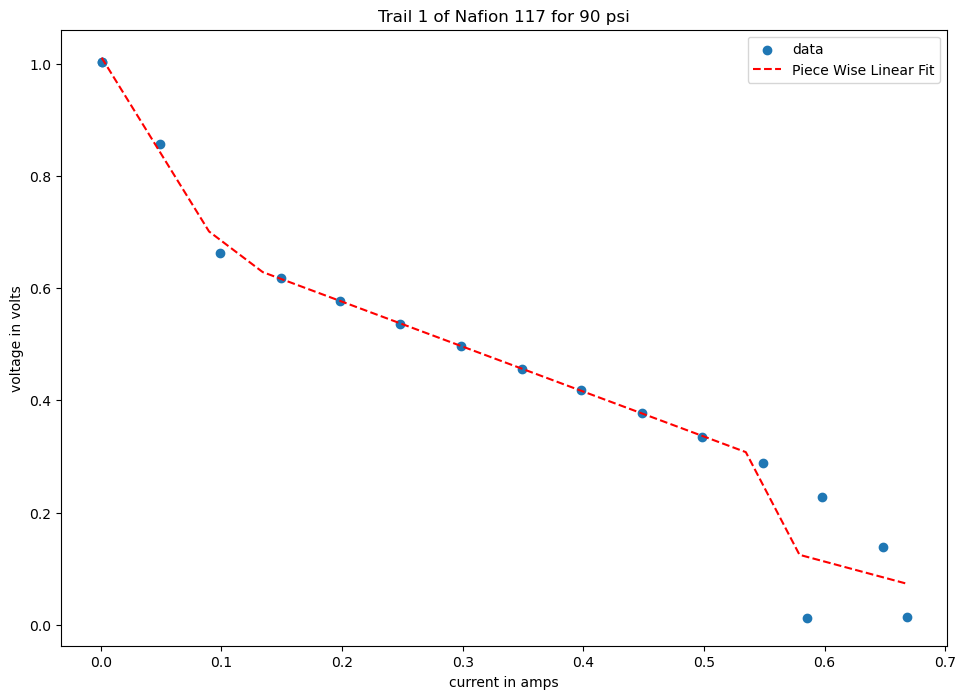

In [21]:
"""The 90 psi trial for Nafion 117. The polarization curve will be fitted by the PolCurve library 
with the outputs uploaded as well. In addition the curve will be fitted using the pwlf, piecewise linear fit library
"""
#the 90 psi trial N117
#lab data:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pwlf
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from polcurvefit import polcurvefit
from scipy.interpolate import pchip_interpolate

data=pd.read_csv('nafion 117 SCCM90 1.txt')
data.columns=['Voltage_V','Current_A','Power_W']
df=pd.DataFrame(data)
df2=df.groupby("Current_A").mean().reset_index()
df3=df2.sort_values(by="Current_A",ascending=False)
x=df3['Current_A'].values
y=df3['Voltage_V'].values

pwlf_pol=pwlf.PiecewiseLinFit(x,y)
breaks=pwlf_pol.fit(4)
#breaks impact the fit, but we are chosing the number based on how many regions we know there are:
#open circuit, active,ohmic and diffusion. It will not be accurate for the diffusion region
print("region changes at currents of:",breaks)
x_pred = np.linspace(x.min(), x.max(), 16)
y_pred = pwlf_pol.predict(x_pred)
# RMSE, and R^2
residuals = y - y_pred
rmse = np.sqrt(mean_squared_error(y, y_pred))
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)


#using polcurve fit the library designed for polarization curves
E=x
I=y

PolCurve=polcurvefit(E,I,R=1.10,sample_surface=1)
#resistance was estimated through linear fitting in lower cells. Inaccuracies may stem from using the default 
#surface area value as the dimensions of the sample surface are unknown so we use the default value of 1
results_active = PolCurve.active_pol_fit(window=[-0.0007,0.1])
results_taffel=PolCurve.linear_fit(window=[.3,.56])
#results_diff=PolCurve.mixed_pol_fit(window=[.6,.7])
PolCurve.save_to_txt(filename = './output_act')
PolCurve.plotting(output_folder='Untitled folder/output_act')
#poly_model=np.poly1d(coeffs)
#Not ideal,it assumes you already know roughly where the regions are so for our small data set with incomplete points it is 
#difficult to get the correct window values. 
plt.figure(figsize=(80,8))
plt.subplot(1, 6, 1)
plt.scatter(data['Current_A'],data['Voltage_V'], label="data")
plt.plot(x_pred,y_pred,"r--", label="Piece Wise Linear Fit")
plt.ylabel("voltage in volts")
plt.xlabel("current in amps")
plt.title("Trail 1 of Nafion 117 for 90 psi")
plt.legend()

print(r2,rmse)


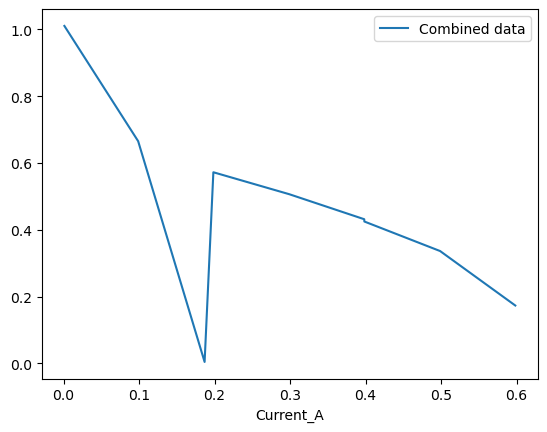

Linear Model     : R² = 0.9678, RMSE = 0.0205, MAE = 0.0188
the resistance is: 1.102705379340228 ohms


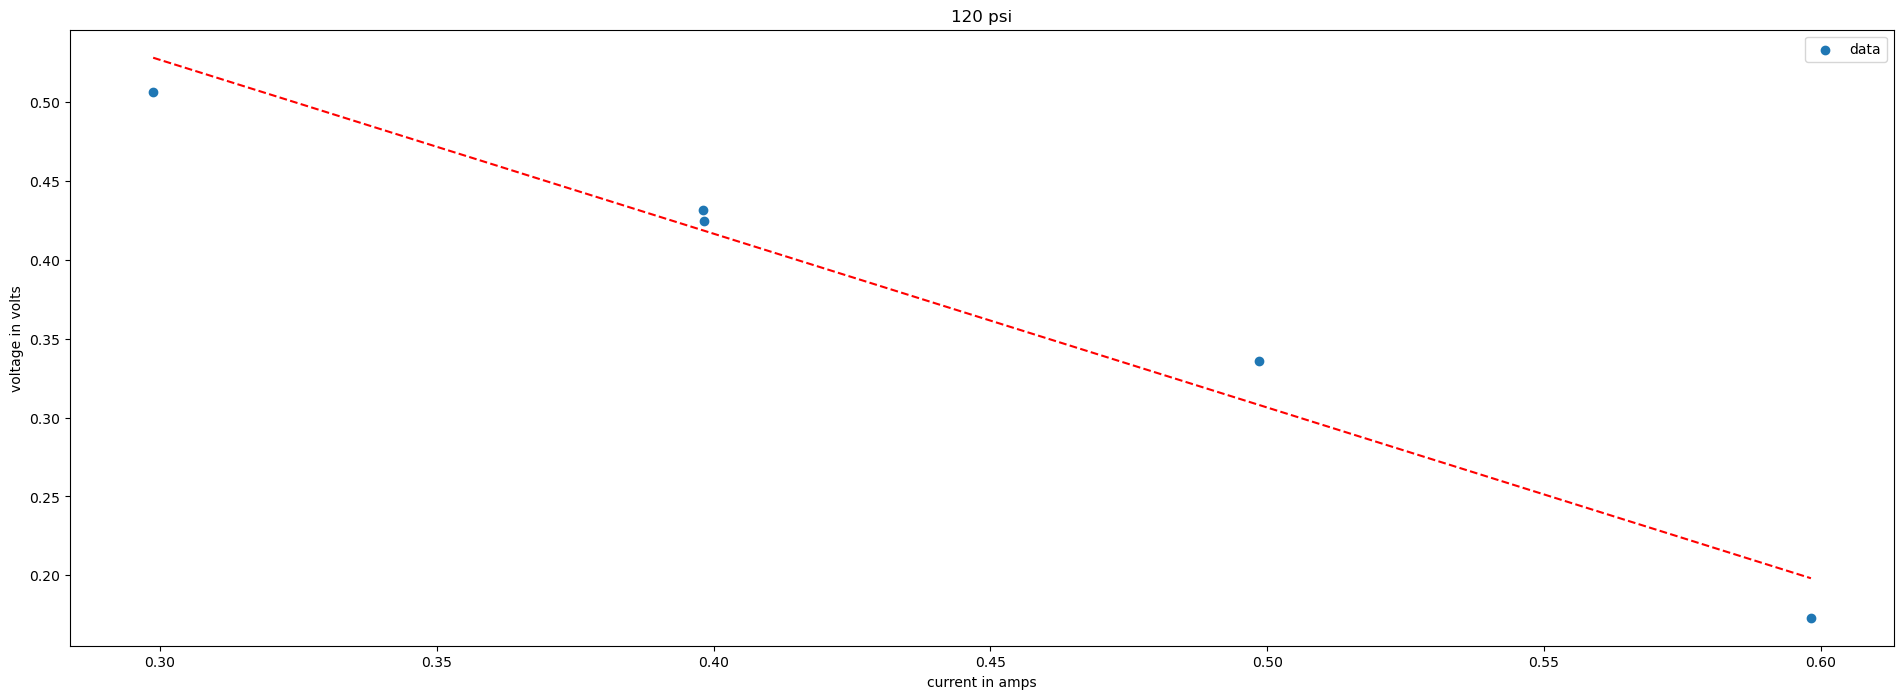

In [25]:
"""Interpolation for the incomplete data set from Nafion 117 at the 120 psi trials
All trials as well as linear fitting for the ohmic range"""
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from scipy.optimize import curve_fit
from sklearn.linear_model import LinearRegression
from scipy.interpolate import interp1d
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from scipy.interpolate import CubicSpline
from polcurvefit import polcurvefit

data=pd.read_csv('nafion 117 SCCM120 1.txt')
data.columns=['Voltage_V','Current_A','Power_W']
#trial 1 120 psi
data2=pd.read_csv('nafion 117 SCCM120 2.txt')
data2.columns=['Voltage_V','Current_A','Power_W']
#trail 2 120 psi
data3=pd.read_csv('nafion 117 SCCM120 3.txt')
data3.columns=['Voltage_V','Current_A','Power_W']
data4=pd.concat((data,data2,data3))
data4=pd.concat((data,data2,data3))
df=pd.DataFrame(data4)

df.describe()
#df.sort_index(axis=1)

"""Concatination of the data since the conditions between the trials were the same.
The dataframe is then ordered and sorted with the repeat values averaged."""

df2.plot("Current_A","Voltage_V",label="Combined data")
plt.legend()
plt.show()
x=df3['Current_A'].values
y=df3['Voltage_V'].values



x=df3['Current_A'].values
y=df3['Voltage_V'].values

"""Linear analysis of the Ohmic region, the slope value will give us the resistance """
#stuff for linear analysis:
slope, intercept, r_value_lin, p_value, std_err = stats.linregress(x, y)
y_pred_lin = intercept + slope * x
residuals_lin = y - y_pred_lin
rmse_lin = np.sqrt(mean_squared_error(y, y_pred_lin))
mae_lin = mean_absolute_error(y, y_pred_lin)
r2_lin = r2_score(y, y_pred_lin)

def linear_model(x, a, b):
    return a + b * x
params, _ = curve_fit(linear_model,x,y)

#plotting
plt.figure(figsize=(80,8))
plt.subplot(1, 3, 1)
plt.scatter(df3['Current_A'],df3['Voltage_V'], label="data")
plt.plot(x,y_pred_lin,"r--")
#plt.plot(x, linear_model(x, *params), 'r--', label=f'y = {params[0]:.2f} + {params[1]:.2f}x')
plt.ylabel("voltage in volts")
plt.xlabel("current in amps")
plt.title("120 psi")
plt.legend()
print(f"Linear Model     : R² = {r2_lin:.4f}, RMSE = {rmse_lin:.4f}, MAE = {mae_lin:.4f}")
print("the resistance is:",slope*-1,"ohms")
#may still need to average the currents... linear interpolation may not be happy
#lets try it anyway

    Current_A  Voltage_V   Power_W
0      0.0010   1.009867  0.000000
1      0.0485   0.847633  0.040000
2      0.0987   0.653500  0.063333
3      0.1488   0.605433  0.090000
4      0.1983   0.563567  0.110000
5      0.2483   0.522600  0.130000
6      0.2988   0.481900  0.143333
7      0.3488   0.438850  0.150000
8      0.3491   0.444200  0.160000
9      0.3981   0.399067  0.160000
10     0.4486   0.355500  0.156667
11     0.4986   0.310133  0.153333
12     0.5489   0.261100  0.143333
13     0.5982   0.208567  0.123333
14     0.6449   0.014100  0.010000
15     0.6484   0.149100  0.096667
16     0.6987   0.144850  0.100000
17     0.7480   0.084400  0.060000


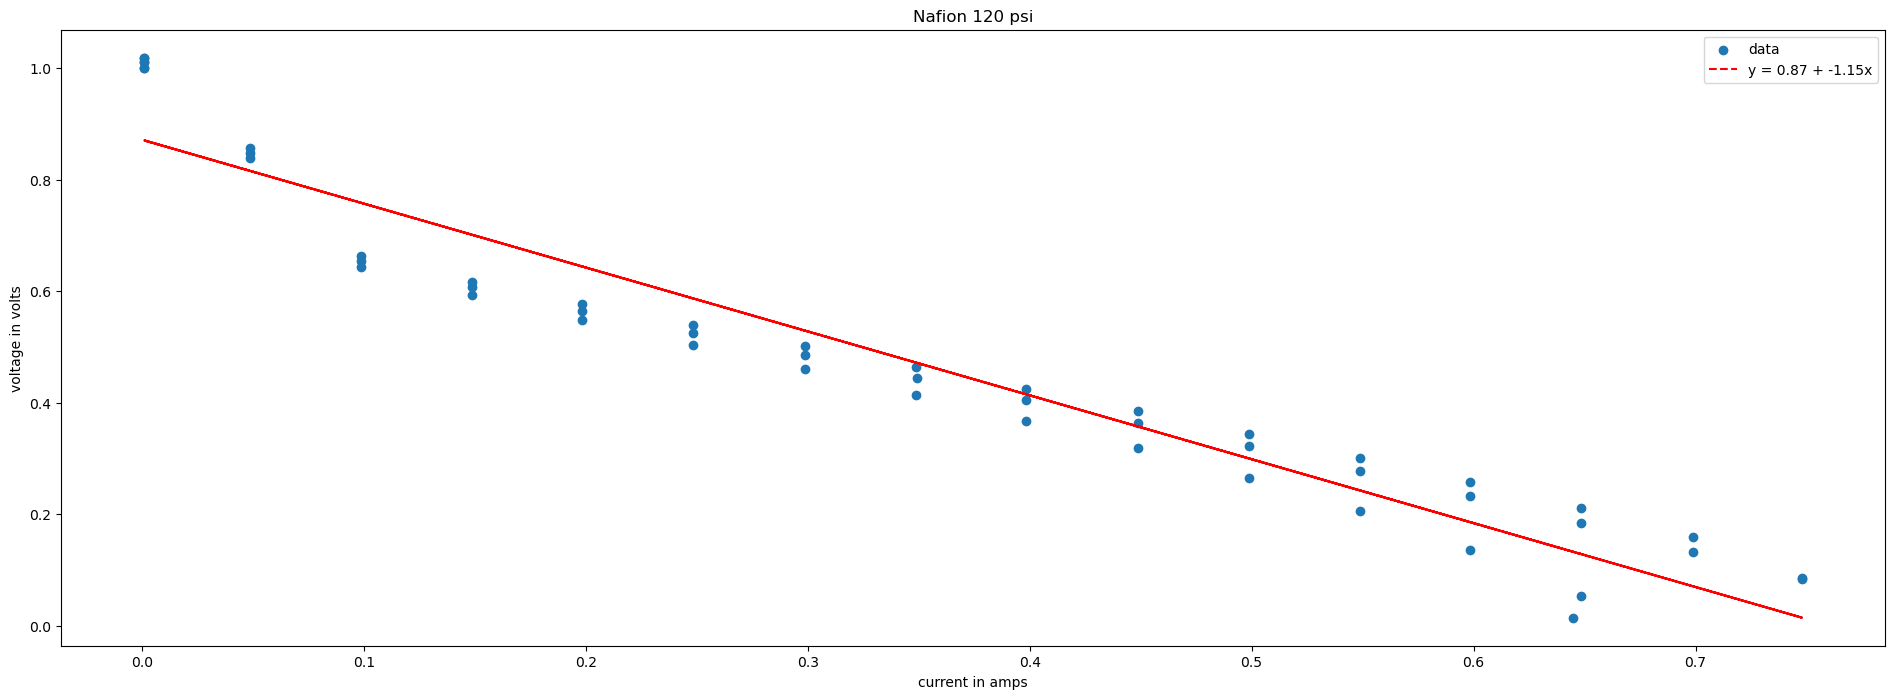

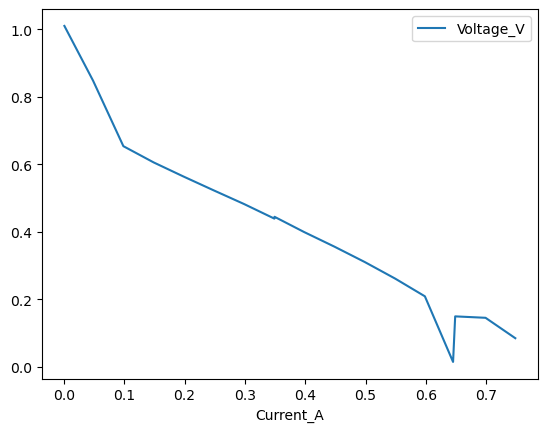

Linear Model     : R² = 0.9987, RMSE = 0.0034, MAE = 0.0027
the resistance is: -0.8572977486395734 ohms


'plt.figure(figsize=(80,8))\nplt.subplot(1, 6, 1)\nplt.scatter(data[\'Current_A\'],data[\'Voltage_V\'], label="data")\nplt.plot(data[\'Current_A\'],data[\'Voltage_V\'],\'r--\', label="data")\nplt.ylabel("voltage in volts")\nplt.xlabel("current in amps")\nplt.title("Trail 1 120 psi")\nplt.legend()\n#^ the first trial\nplt.subplot(1, 6, 2)\nplt.scatter(data2[\'Current_A\'],data2[\'Voltage_V\'], label="data")\nplt.plot(data2[\'Current_A\'],data2[\'Voltage_V\'],\'r--\', label="data")\nplt.ylabel("voltage in volts")\nplt.xlabel("current in amps")\nplt.title("Trail 2 120 psi")\nplt.legend()\n#^the second trial\nplt.subplot(1, 6, 3)\nplt.scatter(data3[\'Current_A\'],data3[\'Voltage_V\'], label="data")\nplt.plot(data3[\'Current_A\'],data3[\'Voltage_V\'],\'r--\', label="data")\nplt.ylabel("voltage in volts")\nplt.xlabel("current in amps")\nplt.title("Trail 3 120 psi")\nplt.legend()\n#^the third trial\n\n#power vs current behavior:\nplt.figure(figsize=(80,8))\n\nplt.subplot(1, 6, 4)\nplt.scatter

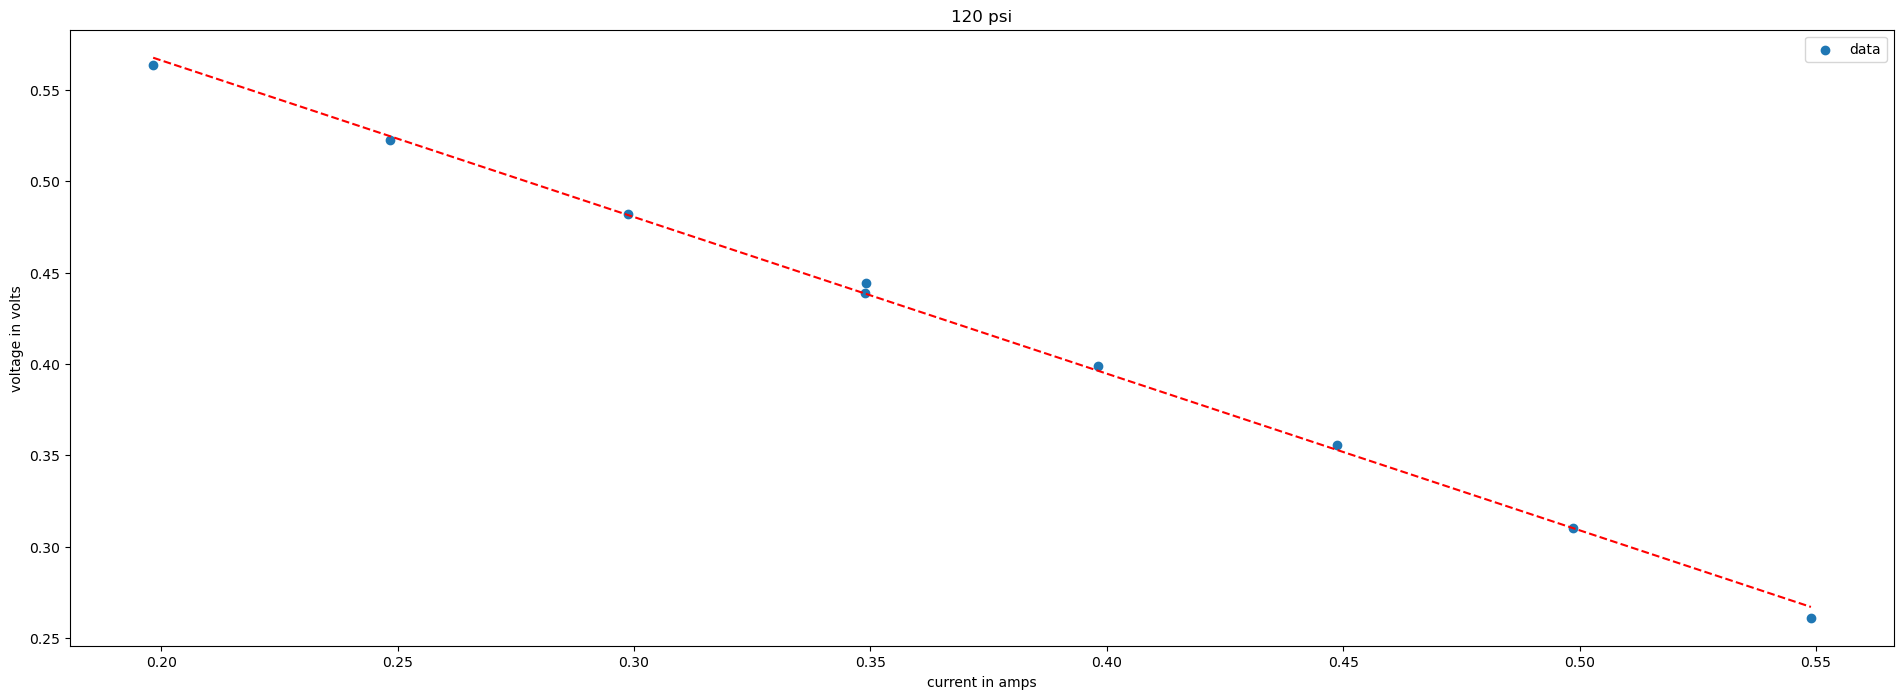

In [14]:
#lab data:
"""The nafion 115 data for the 120 psi trials. Linear fiting is done to find the 
resistance in the ohmic region"""
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from scipy.optimize import curve_fit
from sklearn.linear_model import LinearRegression
from scipy.interpolate import interp1d
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from scipy.interpolate import CubicSpline
from polcurvefit import polcurvefit
#
data=pd.read_csv('nafion 115 SCCM120 1.txt')
data.columns=['Voltage_V','Current_A','Power_W']
#trial 1 120 psi
data2=pd.read_csv('nafion 115 SCCM120 2.txt')
data2.columns=['Voltage_V','Current_A','Power_W']
#trail 2 120 psi
data3=pd.read_csv('nafion 115 SCCM120 3.txt')
data3.columns=['Voltage_V','Current_A','Power_W']

# trial 3 120 psi
data4=pd.concat((data,data2,data3))
x=data4['Current_A'].values
y=data4['Voltage_V'].values
def linear_model(x, a, b):
    return a + b * x
params, _ = curve_fit(linear_model,x,y)

#plotting
plt.figure(figsize=(80,8))
plt.subplot(1, 3, 1)
plt.scatter(data4['Current_A'],data4['Voltage_V'], label="data")
plt.plot(x, linear_model(x, *params), 'r--', label=f'y = {params[0]:.2f} + {params[1]:.2f}x')
plt.ylabel("voltage in volts")
plt.xlabel("current in amps")
plt.title("Nafion 120 psi")
plt.legend()

data4=pd.concat((data,data2,data3))
df=pd.DataFrame(data4)

df.describe()
#df.sort_index(axis=1)

df2=df.groupby("Current_A").mean().reset_index()
df3=df2[4:13]
"""The index is chosen from the graph of the data """
print(df2)
#df[4:12]
df2.plot("Current_A","Voltage_V")
plt.show()
x=df3['Current_A'].values
y=df3['Voltage_V'].values

#stuff for linear analysis:
slope, intercept, r_value_lin, p_value, std_err = stats.linregress(x, y)
y_pred_lin = intercept + slope * x
residuals_lin = y - y_pred_lin
rmse_lin = np.sqrt(mean_squared_error(y, y_pred_lin))
mae_lin = mean_absolute_error(y, y_pred_lin)
r2_lin = r2_score(y, y_pred_lin)



#plotting
plt.figure(figsize=(80,8))
plt.subplot(1, 3, 1)
plt.scatter(df3['Current_A'],df3['Voltage_V'], label="data")
plt.plot(x,y_pred_lin,"r--")
#plt.plot(x, linear_model(x, *params), 'r--', label=f'y = {params[0]:.2f} + {params[1]:.2f}x')
plt.ylabel("voltage in volts")
plt.xlabel("current in amps")
plt.title("120 psi")
plt.legend()
print(f"Linear Model     : R² = {r2_lin:.4f}, RMSE = {rmse_lin:.4f}, MAE = {mae_lin:.4f}")
print("the resistance is:",slope,"ohms")
#may still need to average the currents... linear interpolation may not be happy
#lets try it anyway

